# Project: Churn Rate Prediction - Using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
#1. Import Dataset(Data này được đăng tải trên kaggle: https://www.kaggle.com/datasets/sooryaprakash12/telecom-churn-prediction)
data = pd.read_csv('')

* Chú thích:
 - SeniorCitizen: Người cao tuổi,   Dependents: Người bảo hộ
 - tenure: Nhiệm kỳ/Chu kỳ, PaperlessBilling: Thanh toán ko hóa đơn

In [3]:
#Xem trước 5 dòng đầu tiên của dataset
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Kiểm tra cân bằng giữ liệu.
data.Churn.value_counts() #Mất cân bằng dữ liệu

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
#Kiểm tra trùng lặp cột 'customerID'
is_duplicate = data.duplicated(subset=['customerID'])

if is_duplicate.any():
    print("Có các hàng bị trùng lặp.")
else:
    print("Không có hàng nào bị trùng lặp.")

Không có hàng nào bị trùng lặp.


In [6]:
#Thay thế cột 'customerID' vì dự án sẽ không cần tới, có thể sử dụng index cho định danh khách hàng
data.drop('customerID', axis=1, inplace=True)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
#Xem qua các kiểu dữ liệu của các cột trong dataset, nhằm mục đích có thể bước đầu xác định các cột numberical hoặc categorical
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#Kiểm tra cột TotalCharges -> Kiểu dữ liệu cột đang bị sai.
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
#Convert(chuyển đổi) 'TotalCharges' -> numberical
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce') #Tham số errors sẽ quyết định các giá trị lỗi chuyển thành 'NaN'

In [10]:
#Có 11 giá trị null ở cột TotalCharges, in nó ra và thay thế chúng bằng giá trị trung bình
data['TotalCharges'].isnull().sum()

11

In [11]:
#Thay thế chúng
imputer = SimpleImputer(strategy='mean')

#Fit và transform dữ liệu theo yêu cầu
imputer.fit(data[['TotalCharges']])
data['TotalCharges'] = imputer.transform(data[['TotalCharges']])

In [12]:
#Check again
data['TotalCharges'].isnull().sum()

0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Visualization - Vẽ biểu đồ thể hiện sự tương quan giữa chu kỳ và tỷ lệ rời bỏ 


In [14]:
#Check xem cột có mấy giá trị riêng biệt
data['Churn'].nunique()

2

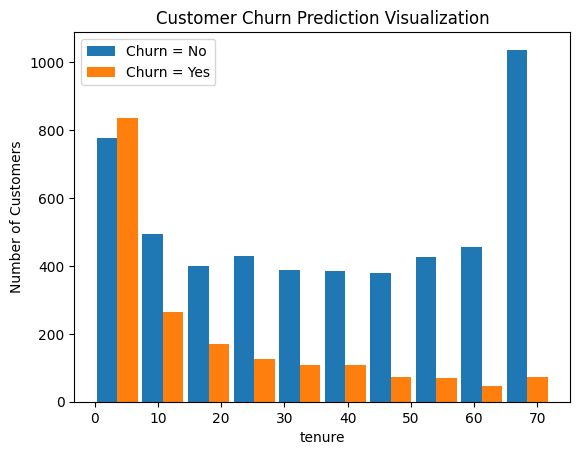

In [15]:
#Visualization - Bằng cách sử dụng dụng API của pyplot
tenure_churn_no = data[data.Churn == 'No'].tenure
tenure_churn_yes = data[data.Churn == 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_no, tenure_churn_yes], rwidth=0.9, label=['Churn = No', 'Churn = Yes']);
plt.legend() 


- Biểu đồ trên thể hiện sự tương quan giữa chu kỳ khách hàng sử dụng với tỷ lệ rời bỏ dịch vụ. 

-> Ta có thể thấy, ở các tháng sử dụng đầu tiên tỷ lệ rời bỏ khách hàng khá là cao gần như là 50/50, với giai đoạn từ khoảng 10 tháng sử dụng dịch vụ tỷ lệ khoảng 33%, và cũng có thể tạm hiểu rằng khách hàng càng sử dụng lâu thì tỷ lệ rời bỏ càng ít. Do vậy chúng ta nên ưu tiên tập trung tăng trải nghiệm dịch vụ ở các tháng đầu tiên.

### Biểu đồ thể hiện sự tương quan giữa Phí hàng tháng và khách hàng rời bỏ

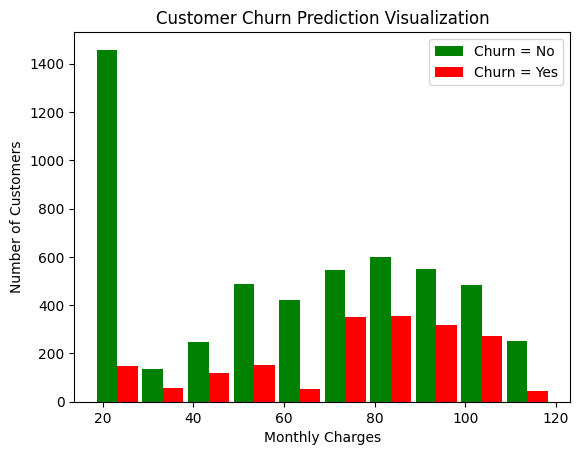

In [16]:
#Tương tự với biểu đồ trên
mc_churn_no = data[data.Churn == 'No'].MonthlyCharges
mc_churn_yes = data[data.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([mc_churn_no, mc_churn_yes], rwidth=0.9, color=['green', 'red'], label=['Churn = No', 'Churn = Yes']);
plt.legend()


- Sự tương quan giữa chi phí hàng tháng và tỷ lệ rời bỏ ở mức 20$/Tháng là khá thấp, tuy nhiên ở mức giá dao động từ 70 - 100$/tháng tỷ lệ rời bỏ khách hàng rất cao, ở mức ~40% đến ~60%. Ta cần chú trọng tới tệp khách hàng trung bình này

In [17]:
#In ra các cột dữ liệu dạng object, phân loại category
def unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [18]:
unique_col_values(data)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [19]:
#Chúng ta cần replace các giá trị 'No phone services' hoặc 'No internet service' về giá trị 0 sau đó encode để tạo tệp train cho học máy
data.replace('No internet service', 'No', inplace=True)
data.replace('No phone service', 'No', inplace=True)

In [20]:
#Kiểm tra lại dữ liệu
unique_col_values(data)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
#Convert các cột chứa giá trị yes, no sang 1 và 0 để chuẩn bị dữ liệu cho mô hình học máy
Y_N_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in Y_N_columns:
    data[col].replace({'Yes': 1, 'No': 0}, inplace=True)

In [22]:
for col in data:
    print(f'{col}: {data[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [23]:
#Tiếp tục với cột gender
data['gender'].replace({
    'Female': 1,
    'Male': 0
}, inplace=True)

data['gender'].unique()

array([1, 0], dtype=int64)

In [24]:
for col in data:
    print(f'{col}: {data[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


#### Mã hóa cột InternetService

In [25]:
#Đếm số lượng của mỗi giá trị 
data['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [26]:
#Sử dụng labelencoder để chuyển cột sang các giá trị 0 1 2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['InternetService'] = le.fit_transform(data['InternetService'])

In [27]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,0,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [28]:
#Check lại 
data['InternetService'].value_counts()

InternetService
1    3096
0    2421
2    1526
Name: count, dtype: int64

In [29]:
#Sử dụng phương thức mã hóa OHE
from sklearn.preprocessing import OneHotEncoder
data_encoded = pd.DataFrame(data['InternetService'], columns=['InternetService'])

ohe =   OneHotEncoder()

ohe_transform = ohe.fit_transform(data_encoded)


In [30]:
encoded_array = ohe_transform.toarray()
encoded_array

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [31]:
#Tạo một dataframe  mới với các cột tương tự để phân loại giá trị
encoded_df = pd.DataFrame(encoded_array, columns=['InternetService_0', 'InternetService_1', 'InternetService_2'])

# Kết hợp DataFrame mới với DataFrame hiện có
data = pd.concat([data, encoded_df], axis=1)
data.drop('InternetService', axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_1,InternetService_2
0,1,0,1,0,1,0,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1.0,0.0,0.0
1,0,0,0,0,34,1,0,1,0,1,...,0,One year,0,Mailed check,56.95,1889.50,0,1.0,0.0,0.0
2,0,0,0,0,2,1,0,1,1,0,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1.0,0.0,0.0
3,0,0,0,0,45,0,0,1,0,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1.0,0.0,0.0
4,1,0,0,0,2,1,0,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,One year,1,Mailed check,84.80,1990.50,0,1.0,0.0,0.0
7039,1,0,1,1,72,1,1,0,1,1,...,1,One year,1,Credit card (automatic),103.20,7362.90,0,0.0,1.0,0.0
7040,1,0,1,1,11,0,0,1,0,0,...,0,Month-to-month,1,Electronic check,29.60,346.45,0,1.0,0.0,0.0
7041,0,1,1,0,4,1,1,0,0,0,...,0,Month-to-month,1,Mailed check,74.40,306.60,1,0.0,1.0,0.0


#### Mã hóa cột contract

In [32]:
#Chuyển đổi giá trị cột Contract
data['Contract'] = le.fit_transform(data['Contract'])

In [33]:
data['Contract'].value_counts()

Contract
0    3875
2    1695
1    1473
Name: count, dtype: int64

In [34]:
#Mã hóa OHE
data_encoded_contract = pd.DataFrame(data['Contract'], columns=['Contract'])
ohe_transform_contract = ohe.fit_transform(data_encoded_contract)
encoded_array_contract = ohe_transform_contract.toarray()
encoded_array_contract


array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [35]:
#Tạo dataframe
encoded_df_contract = pd.DataFrame(encoded_array_contract, columns=['Contract_0', 'Contract_1', 'Contract_2'])

# Kết hợp DataFrame mới với DataFrame trước đó 
data = pd.concat([data, encoded_df_contract], axis=1)
data.drop('Contract', axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_1,InternetService_2,Contract_0,Contract_1,Contract_2
0,1,0,1,0,1,0,0,0,0,1,...,Electronic check,29.85,29.85,0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,0,34,1,0,0,1,0,...,Mailed check,56.95,1889.50,0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,2,1,0,0,1,1,...,Mailed check,53.85,108.15,1,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,45,0,0,0,1,0,...,Bank transfer (automatic),42.30,1840.75,0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,2,1,0,1,0,0,...,Electronic check,70.70,151.65,1,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,0,1,0,...,Mailed check,84.80,1990.50,0,1.0,0.0,0.0,0.0,1.0,0.0
7039,1,0,1,1,72,1,1,1,0,1,...,Credit card (automatic),103.20,7362.90,0,0.0,1.0,0.0,0.0,1.0,0.0
7040,1,0,1,1,11,0,0,0,1,0,...,Electronic check,29.60,346.45,0,1.0,0.0,0.0,1.0,0.0,0.0
7041,0,1,1,0,4,1,1,1,0,0,...,Mailed check,74.40,306.60,1,0.0,1.0,0.0,1.0,0.0,0.0


#### Mã hóa cột PaymentMethod

In [36]:
data['PaymentMethod'] = le.fit_transform(data['PaymentMethod'])
data['PaymentMethod'].value_counts()

PaymentMethod
2    2365
3    1612
0    1544
1    1522
Name: count, dtype: int64

In [37]:
data_encoded_paymentmethod = pd.DataFrame(data['PaymentMethod'], columns=['PaymentMethod'])
ohe_transform_paymentmethod = ohe.fit_transform(data_encoded_paymentmethod)
encoded_array_paymentmethod = ohe_transform_paymentmethod.toarray()
encoded_array_paymentmethod

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [38]:
encoded_df_paymentmethod = pd.DataFrame(encoded_array_paymentmethod, columns=['PaymentMethod_0', 'PaymentMethod_1', 'PaymentMethod_2', 'PaymentMethod_3'])

# Kết hợp DataFrame mới với DataFrame hiện có
data = pd.concat([data, encoded_df_paymentmethod], axis=1)
data.drop('PaymentMethod', axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,InternetService_0,InternetService_1,InternetService_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,1,0,1,0,1,0,0,0,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,34,1,0,0,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,2,1,0,0,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,45,0,0,0,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0,0,2,1,0,1,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,0,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,1,0,1,1,72,1,1,1,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,1,0,1,1,11,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,0,1,1,0,4,1,1,1,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Feature Scaling Data

In [39]:
#Xác định các cột cần scaler 
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

#import phương thức scaler là MinMax 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [40]:
#Xóa các cột dư thừa
col_to_drop = ['InternetService', 'Contract', 'PaymentMethod']
data = data.drop(col_to_drop, axis=1)

In [41]:
for col in data:
    print(f'{col}: {data[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: 

## Xây dựng mô hình

In [42]:
#Xác định tập dữ liệu cần dùng cho mô hình
Y = testlables = data.Churn.astype(np.float32)
X = data.drop('Churn', axis=1)

#Phân chia 80/20 với tệp dữ liệu hiện có chuẩn bị cho mô hình
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=15,stratify=Y)


In [43]:
Y_train.value_counts()

Churn
0.0    4139
1.0    1495
Name: count, dtype: int64

In [44]:
Y.value_counts()

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

In [45]:
Y_test.value_counts()

Churn
0.0    1035
1.0     374
Name: count, dtype: int64

In [46]:
X_train.shape

(5634, 26)

In [47]:
X_test.shape

(1409, 26)

In [48]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_1,InternetService_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
6827,0,0,1,1,0.833333,1,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4146,0,0,1,0,0.486111,1,1,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2432,1,1,1,0,0.694444,1,1,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1029,1,1,1,1,0.041667,1,0,1,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4216,0,0,0,0,1.000000,1,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3948,1,0,1,1,0.777778,1,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2642,1,0,1,0,0.652778,1,0,0,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3598,0,1,0,0,0.013889,1,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6461,0,0,1,0,0.680556,1,0,0,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5534,0,0,0,1,0.291667,1,1,1,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
len(X_train.columns)

26

#### Training Model

In [50]:
#Sử dụng mô hình LogisticRegression, và import classification_report để đánh giá mô hình
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Model = LogisticRegression()
Model.fit(X_train, Y_train) 
accuracy = Model.score(X_test, Y_test)
Y_predict = Model.predict(X_test)
cl_rep = classification_report(Y_test, Y_predict)

In [51]:
#Độ chính xác
accuracy

0.7984386089425124

In [52]:
Y_predict[:5]

array([1., 0., 0., 0., 1.], dtype=float32)

In [53]:
#Đánh giá mô hình
print(cl_rep)

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1035
         1.0       0.65      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



* Kết quả trả về cho thấy mô hình dự báo khả năng khách hàng rời bỏ còn thấp. Mức độ dự đoán chính xác với các khách hàng có tỷ lệ rời bỏ chỉ ~57% (Churn = Yes). Có thể cải thiện mô hình bằng cách thay đổi mô hình dự báo...